In [2]:
#Capstone Project - IOD Dec 2020 - Fraser Stark - Pre Processing

In [36]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")



from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [39]:
df = pd.read_csv("Edinburgh Listings Cleaned - Null Values Fixed.csv")

In [16]:
df.shape

(6435, 62)

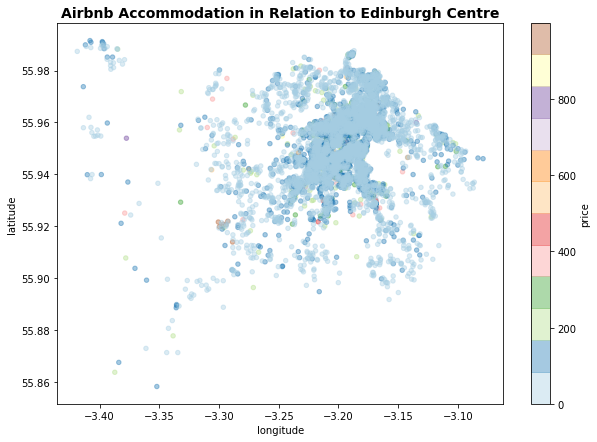

In [58]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="Paired", colorbar=True, sharex=False);
plt.title('Airbnb Accommodation in Relation to Edinburgh Centre', fontsize=14, fontweight='bold');

In [17]:
df.head()

,Unnamed: 0,id,listing_url,scrape_id,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,15420,https://www.airbnb.com/rooms/15420,2.020100e+13,60423,Charlotte,6/12/2009,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.84
1,1,38628,https://www.airbnb.com/rooms/38628,2.020100e+13,165635,Trish,13/07/2010,"Edinburgh, Scotland, United Kingdom",Hi \r\nI like travelling and housing projects ...,within an hour,...,9.0,10.0,10.0,10.0,10.0,t,2,2,0,0.72
2,2,44009,https://www.airbnb.com/rooms/44009,2.020100e+13,192586,Puneet,5/08/2010,"Edinburgh, Scotland, United Kingdom",I am a Management Consultant and a Creative Ph...,NaN,...,10.0,10.0,9.0,9.0,9.0,f,1,0,1,0.31
3,3,54188,https://www.airbnb.com/rooms/54188,2.020100e+13,253850,Natalie,5/10/2010,"Edinburgh, Scotland, United Kingdom","Ahoy,\r\nI am Skipper Cam, the proud owner of ...",within a day,...,9.0,9.0,9.0,10.0,9.0,t,1,1,0,0.31
4,4,55881,https://www.airbnb.com/rooms/55881,2.020100e+13,264345,Susie,17/10/2010,"London, England, United Kingdom",I am a musician and my husband is an artist. W...,within a few hours,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.16


In [18]:
len(df['neighbourhood_cleansed'])

6435

In [19]:
len(df['neighbourhood_cleansed'].unique())

111

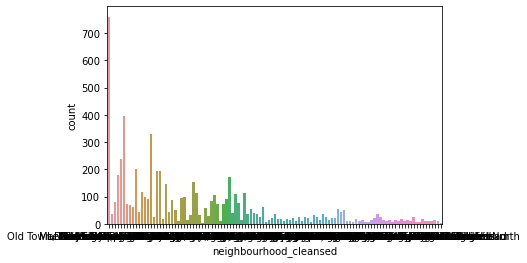

In [20]:
sns.countplot('neighbourhood_cleansed', data=df)
plt.show()

In [21]:
df

,Unnamed: 0,id,listing_url,scrape_id,host_id,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,15420,https://www.airbnb.com/rooms/15420,2.020100e+13,60423,Charlotte,6/12/2009,"Edinburgh, Scotland, United Kingdom","I have a background in property, having worked...",within an hour,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.84
1,1,38628,https://www.airbnb.com/rooms/38628,2.020100e+13,165635,Trish,13/07/2010,"Edinburgh, Scotland, United Kingdom",Hi \r\nI like travelling and housing projects ...,within an hour,...,9.0,10.0,10.0,10.0,10.0,t,2,2,0,0.72
2,2,44009,https://www.airbnb.com/rooms/44009,2.020100e+13,192586,Puneet,5/08/2010,"Edinburgh, Scotland, United Kingdom",I am a Management Consultant and a Creative Ph...,NaN,...,10.0,10.0,9.0,9.0,9.0,f,1,0,1,0.31
3,3,54188,https://www.airbnb.com/rooms/54188,2.020100e+13,253850,Natalie,5/10/2010,"Edinburgh, Scotland, United Kingdom","Ahoy,\r\nI am Skipper Cam, the proud owner of ...",within a day,...,9.0,9.0,9.0,10.0,9.0,t,1,1,0,0.31
4,4,55881,https://www.airbnb.com/rooms/55881,2.020100e+13,264345,Susie,17/10/2010,"London, England, United Kingdom",I am a musician and my husband is an artist. W...,within a few hours,...,10.0,10.0,10.0,10.0,10.0,f,1,1,0,2.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,6551,45954491,https://www.airbnb.com/rooms/45954491,2.020100e+13,372306305,Dongquan,17/10/2020,GB,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,t,5,0,5,0.00
6431,6552,45954492,https://www.airbnb.com/rooms/45954492,2.020100e+13,372306305,Dongquan,17/10/2020,GB,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,t,5,0,5,0.00
6432,6553,45956096,https://www.airbnb.com/rooms/45956096,2.020100e+13,313086955,Raymond,29/11/2019,"Edinburgh, Scotland, United Kingdom",NaN,within an hour,...,0.0,0.0,0.0,0.0,0.0,f,2,0,2,0.00
6433,6554,45967573,https://www.airbnb.com/rooms/45967573,2.020100e+13,2989965,Ocean Serviced Apartments,19/07/2012,"Edinburgh, Scotland, United Kingdom","Hi, We are Ocean Serviced Apartments.\r\nWe ha...",within a few hours,...,0.0,0.0,0.0,0.0,0.0,t,6,4,0,0.00


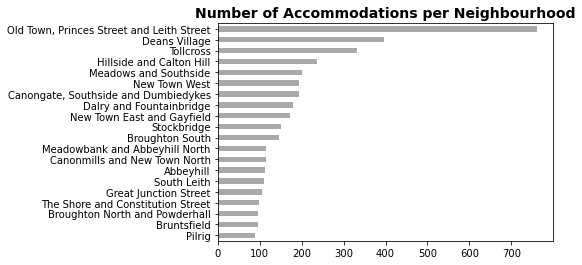

In [23]:
df['neighbourhood_cleansed'].value_counts().sort_values().tail(20).plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per Neighbourhood', fontsize=14, fontweight='bold');

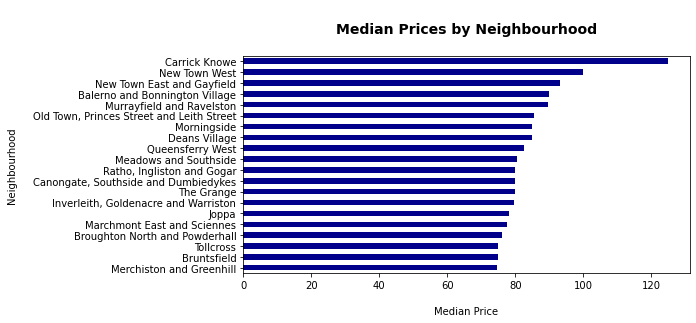

In [26]:

# group_by neighbourhood groups, take the median price and store new values in sub_df 
df = pd.DataFrame(df.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
df.reset_index(inplace=True)

# plot this 
df.sort_values(by=['price'], ascending=True).tail(20).plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                figsize=(8,4), legend=False, color='darkblue')

plt.xlabel('\nMedian Price', fontsize=10)
plt.ylabel('Neighbourhood\n', fontsize=10)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

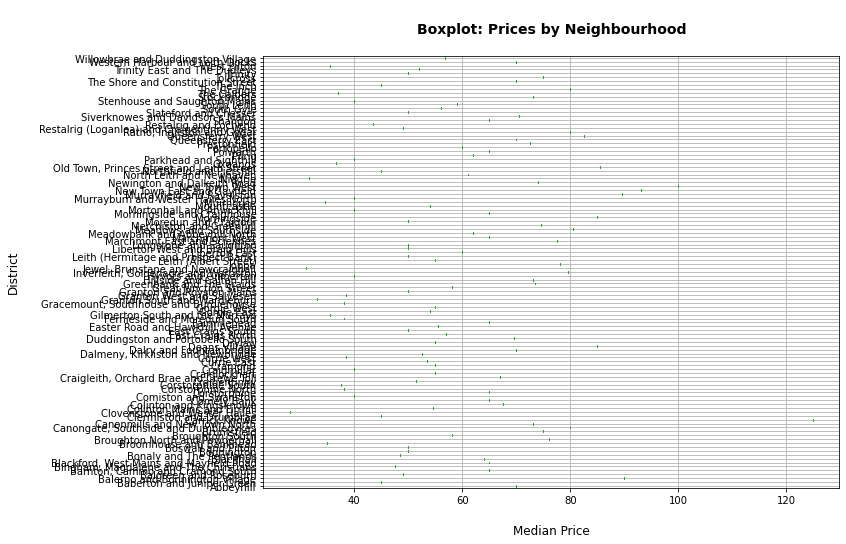

In [33]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

df.boxplot(column='price', by='neighbourhood_cleansed',
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');